In [27]:
import numpy as np
import math
import random
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

import osmnx as ox
import networkx as nx
from pyproj import CRS
from shapely.strtree import STRtree
from shapely.geometry import Point

import requests
import time

from rdd import *

import warnings
warnings.filterwarnings("ignore")

G = ox.load_graphml('../Mapping/data/London_pm.graphml', edge_dtypes={"length": float, "grade": float, "grade_abs": float, 
                                                                      "bearing": float, "speed_kph": float, "travel_time": float,
                                                                      'greenness': float, 'rdd_a': float, 'rdd_b': float, 
                                                                      'cost_a': float, 'cost_b': float, 'travel_time_a': float,
                                                                      'travel_time_b': float})
nodes, edges = ox.graph_to_gdfs(G)
projection = CRS.from_epsg(3067)
nodes = nodes.to_crs(projection)
edges = edges.to_crs(projection)

A recieves 62.70 ug of PM2.5 on his journey. B recieves 65.81 ug. A taking short route would recieve 68.66 ug
A takes 21.94 minutes to complete his journey. B takes 25.82 minutes. Short route would take 21.15 minutes for A to cycle.


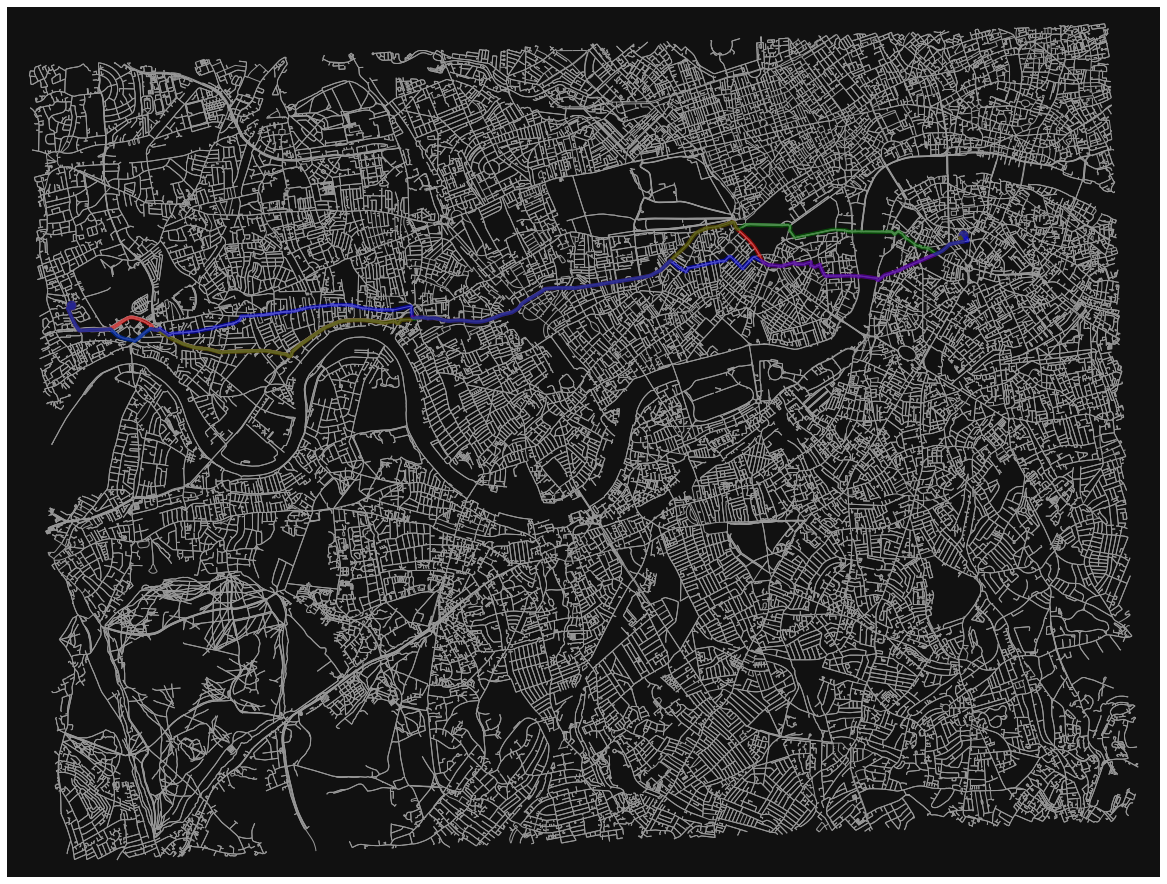

In [34]:
orig = list(G)[np.random.randint(len(list(G)))]
dest = list(G)[np.random.randint(len(list(G)))]
# orig = 104278702
# dest = 919629162

short = ox.shortest_path(G, orig, dest, weight='travel_time')
pma = ox.shortest_path(G, orig, dest, weight='cost_a')
pmb = ox.shortest_path(G, orig, dest, weight='cost_b')

rdd_short = (np.sum(ox.utils_graph.get_route_edge_attributes(G, short, "rdd_a")))
time_short = (np.sum(ox.utils_graph.get_route_edge_attributes(G, short, "travel_time_a")))
rdd_a = (np.sum(ox.utils_graph.get_route_edge_attributes(G, pma, "rdd_a")))
time_a = (np.sum(ox.utils_graph.get_route_edge_attributes(G, pma, "travel_time_a")))
rdd_b = (np.sum(ox.utils_graph.get_route_edge_attributes(G, pmb, "rdd_a")))
time_b = (np.sum(ox.utils_graph.get_route_edge_attributes(G, pmb, "travel_time_b")))
print(f"A recieves {rdd_a:.2f} ug of PM2.5 on his journey. B recieves {rdd_b:.2f} ug. A taking short route would recieve {rdd_short:.2f} ug")
print(f"A takes {time_a:.2f} minutes to complete his journey. B takes {time_b:.2f} minutes. Short route would take {time_short:.2f} minutes for A to cycle.")

fig, ax = ox.plot_graph_routes(G, routes=[short, pma, pmb], route_colors=['r','g','b'], node_size=0, figsize=(24,16))
ax.set_axis_off()
plt.show()